In [53]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv("resources/diabetes.csv")
data.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnancies     768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood_pressure  768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   bmi             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Пустых значений нет. Категориальных признаков тоже нет.

In [56]:
data.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


S:\Uni\ai\ITMO-AI-Systems\Lab 4\ai-systems-lab4\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\hopsb\AppData\Local\Temp\ipykernel_15060\367291811.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([means[i], means[i]], [0, np.max(hist[0])], color="red")
C:\Users\hopsb\AppData\Local\Temp\ipykernel_15060\367291811.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by

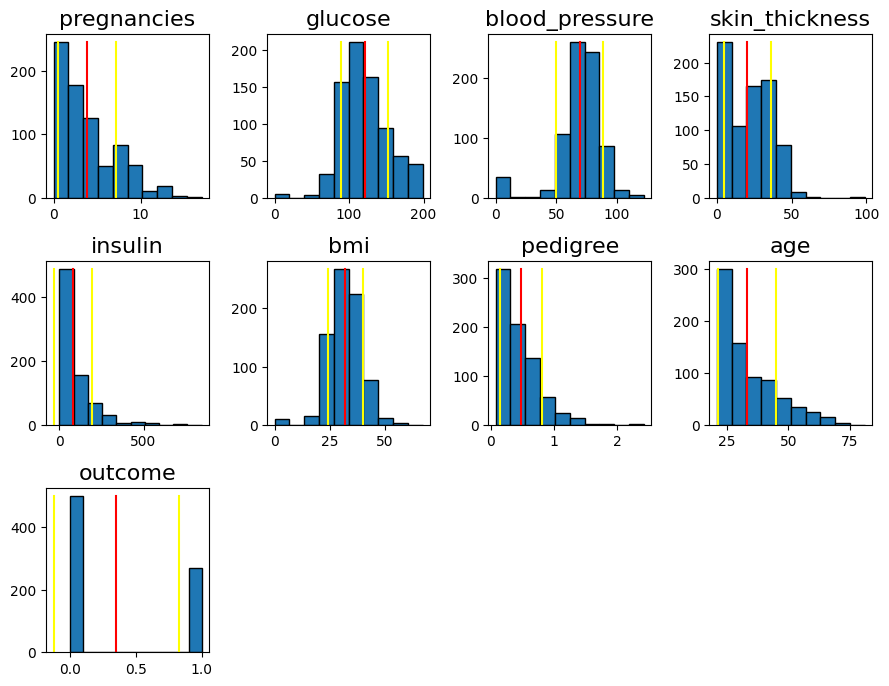

In [57]:
means = data.mean()
corrected_dispersions = np.sum(np.power(data - means, 2)) / (data.shape[0] - 1)
standard_offsets = np.sqrt(corrected_dispersions)
bins_count = 1 + int(math.log(data.shape[0], 2))
titles = data.columns
fig = plt.figure(figsize=(9, 9))
for i, column in enumerate(titles):
    ax = fig.add_subplot(4, 4, i + 1)
    hist = ax.hist(data[column], bins=bins_count, edgecolor="black")
    ax.plot([means[i], means[i]], [0, np.max(hist[0])], color="red")
    ax.plot([means[i] - standard_offsets[i], means[i] - standard_offsets[i]], [0, np.max(hist[0])], color="yellow")
    ax.plot([means[i] + standard_offsets[i], means[i] + standard_offsets[i]], [0, np.max(hist[0])], color="yellow")
    ax.set_title(titles[i], fontsize=16)
fig.tight_layout()
plt.show()

In [58]:
def normalize(df):
    df_normal = df.copy()
    for col in df.columns:
        mean = df_normal[col].mean()
        std = df_normal[col].std()
        df_normal[col] = (df_normal[col] - mean) / std
    return df_normal

In [59]:
def train_test_split(x, y):
    split_index = int(0.75 * len(x))
    x_train = x.iloc[:split_index].reset_index(drop=True)
    x_test = x.iloc[split_index:].reset_index(drop=True)
    y_train = y.iloc[:split_index].reset_index(drop=True)
    y_test = y.iloc[split_index:].reset_index(drop=True)
    return x_train, x_test, y_train, y_test

In [60]:
X = data.drop(columns='outcome')
y = data['outcome']
X = (X - X.mean()) / (X.max() - X.min())

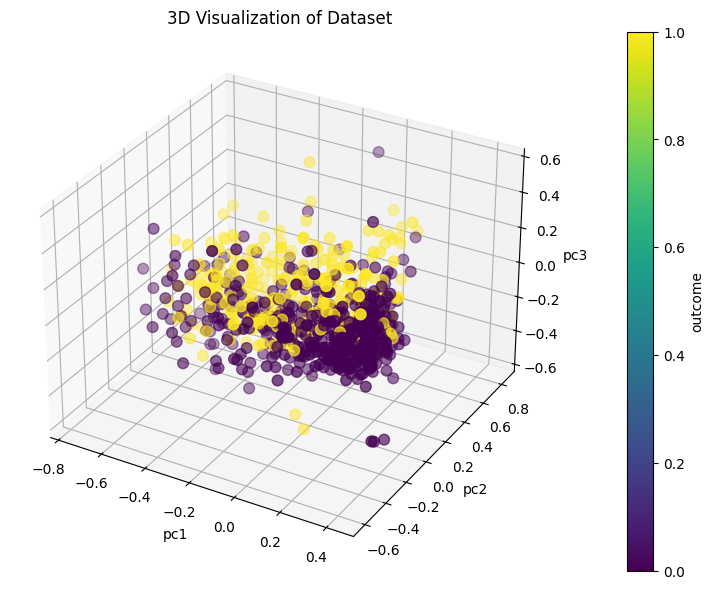

In [61]:
# Преобразуем DataFrame в numpy массив для расчетов
xv = X.values

# Шаг 1: Вычисление ковариационной матрицы
cov_matrix = np.cov(xv, rowvar=False)

# Шаг 2: Вычисление собственных значений и собственных векторов
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Шаг 3: Сортировка собственных векторов по убыванию собственных значений
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Шаг 4: Выбор первых трех собственных векторов
eigenvectors_3d = sorted_eigenvectors[:, :3]

# Шаг 5: Проекция данных на новые главные компоненты
xv_pca = xv.dot(eigenvectors_3d)

# Создаем 3D-график
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Отображаем данные, используя цвет для обозначения целевого признака
scatter = ax.scatter(xv_pca[:, 0], xv_pca[:, 1], xv_pca[:, 2], c=y, cmap='viridis', marker='o', s=60)
ax.set_title("3D Visualization of Dataset")
ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("pc3")

# Добавляем цветовую шкалу для обозначения значений целевого признака
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('outcome')

plt.show()

In [62]:
from collections import Counter


# Метод k-ближайших соседей
def k_nearest_neighbors(x_train, y_train, x_test, k):
    predictions = []
    
    # Пробегаемся по каждому элементу в тестовом наборе
    for test_point in x_test.values:
        # Вычисляем расстояние до каждого элемента обучающего набора
        distances = np.linalg.norm(x_train.values - test_point, axis=1)
        
        # Находим k ближайших соседей
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train.iloc[k_indices]
        
        # Получаем наиболее распространенный класс среди k ближайших соседей
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    
    return np.array(predictions)

In [63]:
def confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    matrix = pd.DataFrame(
        0, index=unique_labels, columns=unique_labels, dtype=int
    )

    # Заполняем матрицу ошибок
    for true, pred in zip(y_true, y_pred):
        matrix.loc[true, pred] += 1
    
    return matrix

In [64]:
# Разделение на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(X, y)

# Модель 1: Случайный набор признаков
np.random.seed(0)
random_features = np.random.choice(x_train.columns, 3, replace=False)
x_train_random = x_train[random_features]
x_test_random = x_test[random_features]

# Модель 2: Фиксированный набор признаков
fixed_features = ['glucose', 'insulin', 'age']  # Замените на нужные признаки
x_train_fixed = x_train[fixed_features]
x_test_fixed = x_test[fixed_features]

# Различные значения k для тестирования
k_values = [3, 5, 10]

# Проходимся по значениям k и строим матрицы ошибок для каждой модели
for k in k_values:
    print(f"\n--- k = {k} ---")

    # Модель 1: Случайный набор признаков
    y_pred_random = k_nearest_neighbors(x_train_random, y_train, x_test_random, k)
    matrix_random = confusion_matrix(y_test, y_pred_random)
    print(f"Матрица ошибок для Модели 1 (случайные признаки):\n{matrix_random}")
    
    # Модель 2: Фиксированный набор признаков
    y_pred_fixed = k_nearest_neighbors(x_train_fixed, y_train, x_test_fixed, k)
    matrix_fixed = confusion_matrix(y_test, y_pred_fixed)
    print(f"Матрица ошибок для Модели 2 (фиксированные признаки):\n{matrix_fixed}")



--- k = 3 ---
Матрица ошибок для Модели 1 (случайные признаки):
    0   1
0  98  24
1  38  32
Матрица ошибок для Модели 2 (фиксированные признаки):
    0   1
0  95  27
1  26  44

--- k = 5 ---
Матрица ошибок для Модели 1 (случайные признаки):
     0   1
0  100  22
1   35  35
Матрица ошибок для Модели 2 (фиксированные признаки):
     0   1
0  102  20
1   25  45

--- k = 10 ---
Матрица ошибок для Модели 1 (случайные признаки):
     0   1
0  107  15
1   37  33
Матрица ошибок для Модели 2 (фиксированные признаки):
     0   1
0  100  22
1   29  41
